<a href="https://colab.research.google.com/github/Kyvelos/Thesis/blob/main/THESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Kyvelos/Thesis.git

Cloning into 'Thesis'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 26 (delta 8), reused 16 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 37.18 KiB | 1.24 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [5]:
!git pull origin main
%ls

fatal: not a git repository (or any of the parent directories): .git
drive/  sample_data/  Thesis/


In [32]:
!pip install SimpleITK pynrrd numpy matplotlib ipywidgets  google.colab pandas > /dev/null 2>&1


In [15]:

import os
import SimpleITK as sitk
import numpy as np
import pandas as pd

# Διαδρομή όπου βρίσκονται οι φάκελοι των ασθενών
base_path = "/content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter"

# Λίστα για αποθήκευση των αποτελεσμάτων
results = []

# Διατρέχουμε τους φακέλους των ασθενών (Patient_1, Patient_2, ..., Patient_20)
for patient_id in range(1, 21):
    patient_folder = os.path.join(base_path, f"Patient {patient_id}")

    # Εύρεση των σωστών αρχείων μέσα στον φάκελο
    segmentation_file = os.path.join(patient_folder, "Segmentation.seg.nrrd")
    image_files = [f for f in os.listdir(patient_folder) if f.endswith(".nrrd") and "No series description" in f]

    if not image_files or not os.path.exists(segmentation_file):
        print(f"❌ Δεν βρέθηκαν τα απαραίτητα αρχεία για Patient_{patient_id}")
        continue

    image_file = os.path.join(patient_folder, image_files[0])

    # Διαβάζουμε τα αρχεία NRRD
    image = sitk.ReadImage(image_file)
    segmentation = sitk.ReadImage(segmentation_file)

    # Μετατροπή σε numpy arrays
    image_array = sitk.GetArrayFromImage(image)  # (Slices, Height, Width)
    segmentation_array = sitk.GetArrayFromImage(segmentation)  # (Slices, Height, Width)

    # Εύρεση slices που περιέχουν segmentation
    slices_with_segmentation = np.where(np.any(segmentation_array > 0, axis=(1,2)))[0]

    # Αποθήκευση των αποτελεσμάτων
    results.append({"Patient": patient_id, "Slices_with_Segmentation": list(slices_with_segmentation)})

    print(f"✔ Patient_{patient_id} -> Slices με segmentation: {slices_with_segmentation}")

# Αποθήκευση αποτελεσμάτων σε CSV
df = pd.DataFrame(results)
df.to_csv("slices_with_segmentation.csv", index=False)

print("✅ Τα αποτελέσματα αποθηκεύτηκαν στο slices_with_segmentation.csv")


✔ Patient_1 -> Slices με segmentation: [ 54  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292

In [18]:
import os
os.listdir()

['.config', 'Thesis', 'slices_with_segmentation.csv', 'drive', 'sample_data']

In [31]:
!mv slices_with_segmentation.csv "/content/drive/My Drive/slices_with_segmentation.csv"

mv: cannot stat 'slices_with_segmentation.csv': No such file or directory




```
 What This Code Does
✅ Loads the patient's medical image & segmentation mask
✅ Extracts the specified slice
✅ Overlays the segmentation mask using transparency
✅ Displays it using Matplotlib

📌 Modify patient_id and slice_index to visualize different slices.
```



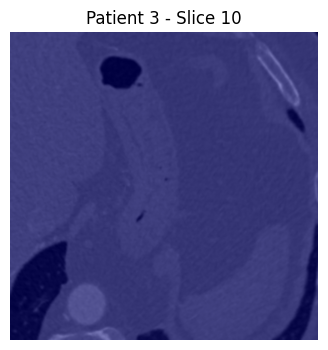

In [23]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize a specific slice
def show_slice(patient_id, slice_index):
    base_path = "/content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter"
    patient_folder = f"{base_path}/Patient {patient_id}"

    # Find the correct files
    segmentation_file = f"{patient_folder}/Segmentation.seg.nrrd"

    # Get all available image files
    image_files = [f for f in os.listdir(patient_folder) if f.endswith(".nrrd") and "No series description" in f]

    if not image_files or not os.path.exists(segmentation_file):
        print(f"❌ Files not found for Patient {patient_id}")
        return

    image_file = os.path.join(patient_folder, image_files[0])

    # Read NRRD files
    image = sitk.ReadImage(image_file)
    segmentation = sitk.ReadImage(segmentation_file)

    # Convert to numpy arrays
    image_array = sitk.GetArrayFromImage(image)  # (Slices, Height, Width)
    segmentation_array = sitk.GetArrayFromImage(segmentation)  # (Slices, Height, Width)

    # Check if slice index is valid
    if slice_index < 0 or slice_index >= image_array.shape[0]:
        print(f"❌ Slice {slice_index} is out of bounds (valid range: 0 to {image_array.shape[0]-1})")
        return

    # Show the selected slice
    plt.figure(figsize=(4, 4))
    plt.imshow(image_array[slice_index], cmap="gray")  # Show CT/MRI slice
    plt.imshow(segmentation_array[slice_index], cmap="jet", alpha=0.5)  # Overlay segmentation
    plt.title(f"Patient {patient_id} - Slice {slice_index}")
    plt.axis("off")
    plt.show()




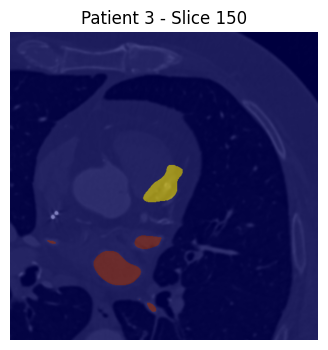

In [30]:
# Example: Show slice 10 for Patient 3
show_slice(patient_id=3, slice_index=150)